In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
#load dataset from csv
df = pd.read_csv("/Users/sa21/Desktop/TLAB-Music-Recommendation/Data/raw/train.csv")
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [41]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


From the dataset summary, the average song length is approximately 73 seconds, with a wide range from 1 to 199 seconds, this makes me think the tracks are very diverse. The release_date spans from 1950 to 2019.

In [96]:
#features names
col_names = df.columns

col_names

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

The dataset has 24 columns, with no missing values in any of the features. Most of the columns are either floats or intergers, which is good for clustering and modeling. There are also a few object type columns (like artist_name, track_name, lyrics, and genre) that will likely be dropped.

In [44]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


# Univariate Exploratory Analysis

<Axes: xlabel='genre', ylabel='count'>

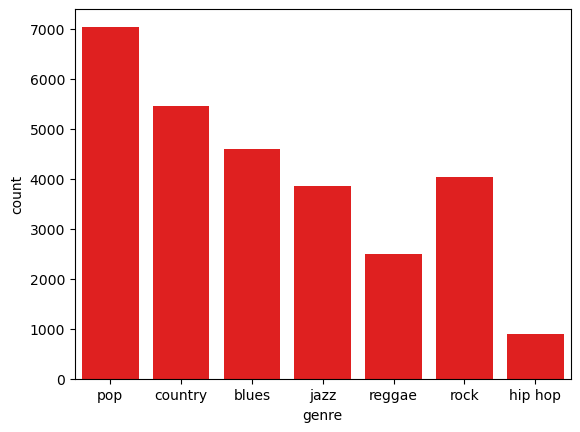

In [ ]:
# count plot of genre column 
sns.countplot(x='genre', data=df, color='red')

This bar plot displays the distribution of song genres. Pop is the most represented genre, followed by country and blues. Hip hop appears the least amount of times. 

<Axes: xlabel='topic', ylabel='count'>

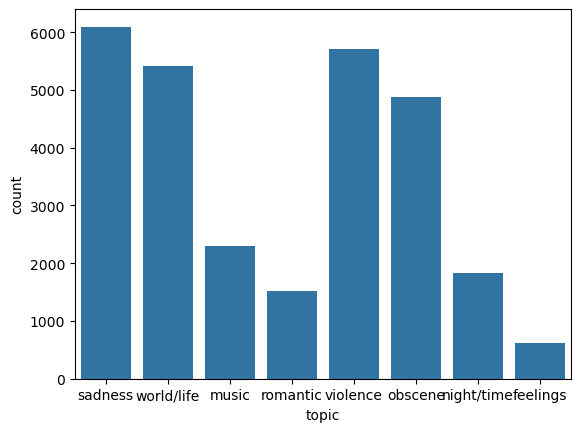

In [ ]:
# count plot of topics column 
sns.countplot(x='topic', data=df)

This bar chart visualizes the frequency of lyrical topics "Sadness," "violence," and "world/life" are the most common topics. And "feelings" and "romantic" themes appear less often. This distribution can inform how clusters might capture dominant themes across songs.

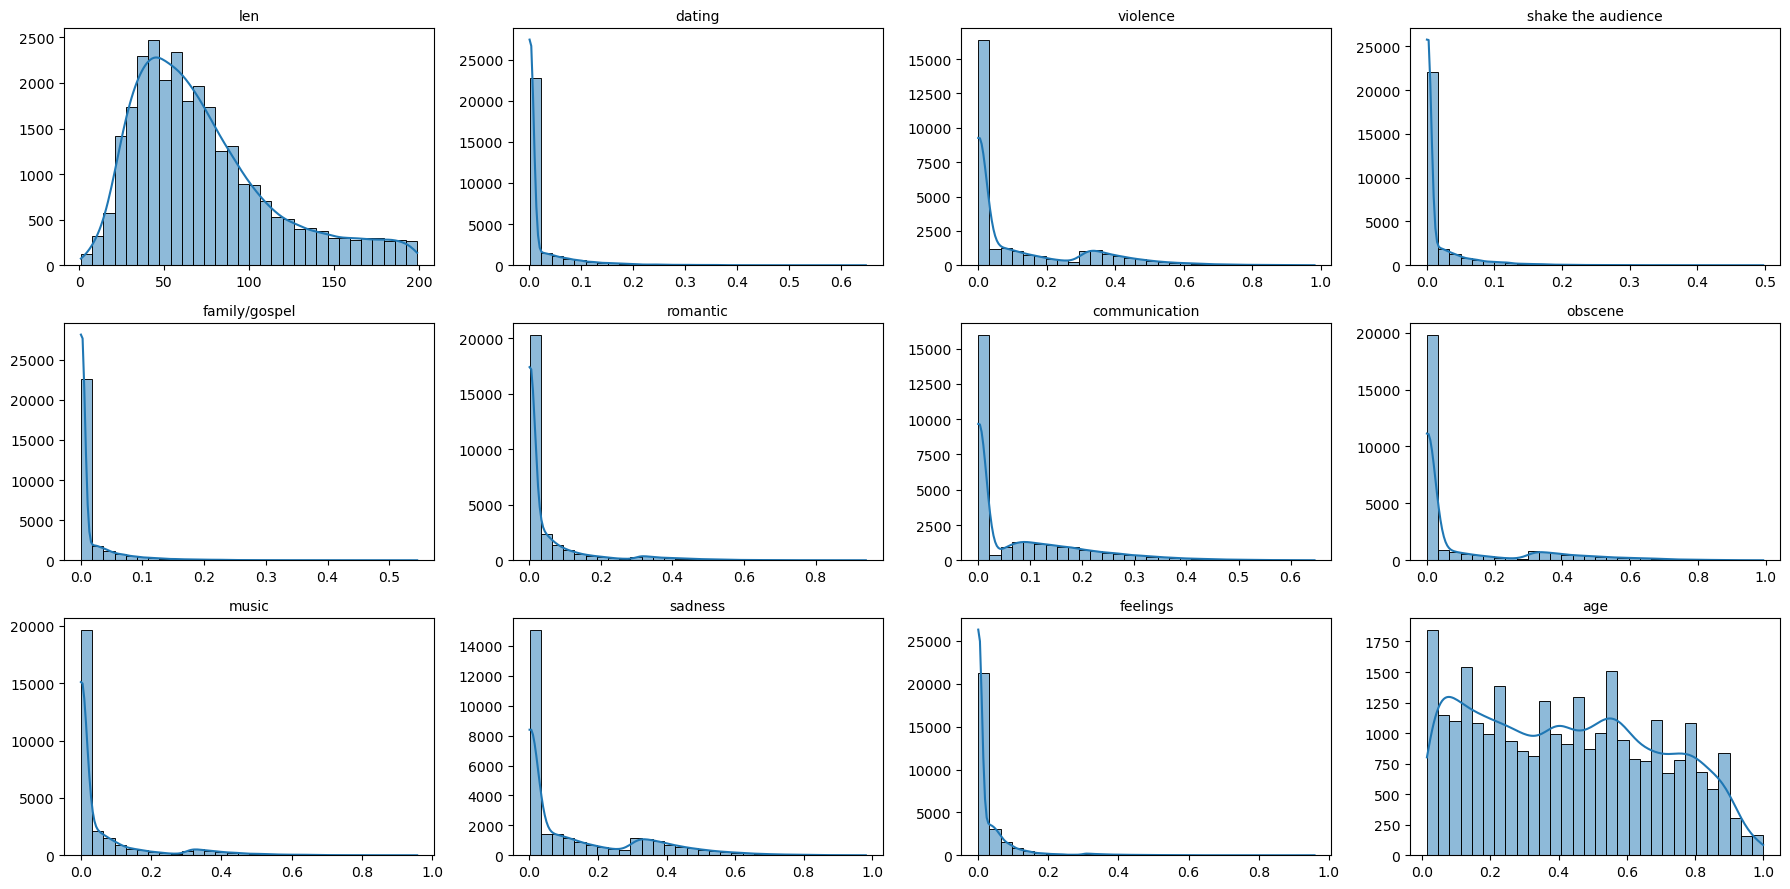

In [85]:
# Selected columns
cols = [
    'len', 'dating', 'violence', 'shake the audience', 'family/gospel',
    'romantic', 'communication', 'obscene', 'music', 'sadness', 'feelings', 'age'
]

# Set up subplot grid: 4 columns per row
n_cols = 4
n_rows = -(-len(cols) // n_cols)  # Ceiling division
# distribution plot for many features 
plt.figure(figsize=(18, n_rows * 3))  # Adjust figure size

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30,)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Lyrical features (violence, sadness, romantic, obscene) are right-skewed, meaning the majority of songs have low values in these categories, with a few songs showing high intensity. The len feature is roughly normal but slightly skewed, and age appears more evenly distributed. These distributions suggest Unevenly distributions, scaling might be necessary to avoid bias from dominant features

# Bivariate Exploratory Analysis

In [97]:
# col_names
col_names

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

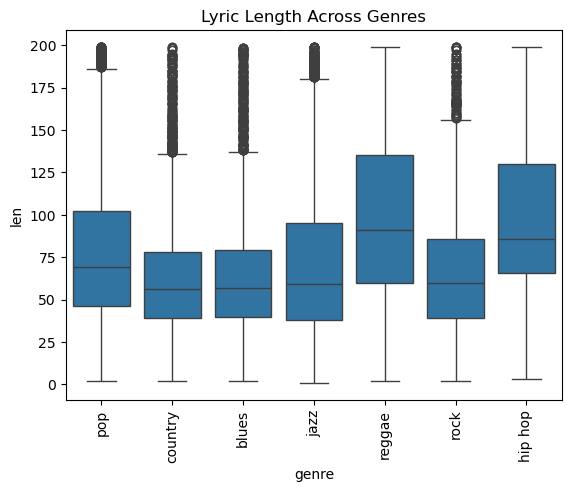

In [77]:
sns.boxplot(data=df, x="genre", y="len")
plt.xticks(rotation=90)
plt.title("Lyric Length Across Genres")
plt.show()

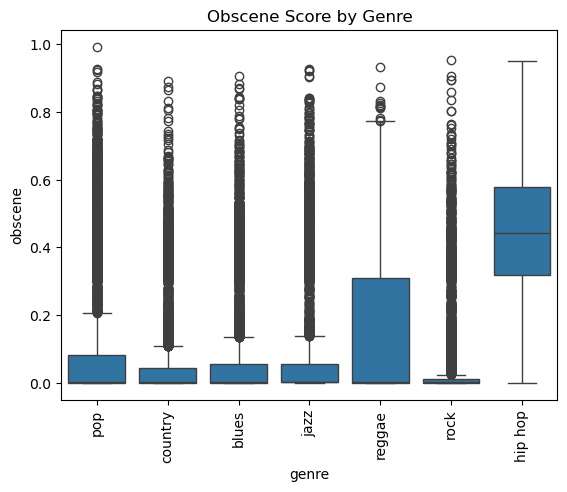

In [70]:
sns.boxplot(data=df, x='genre', y='obscene')
plt.xticks(rotation=90)
plt.title('Obscene Score by Genre')
plt.show()

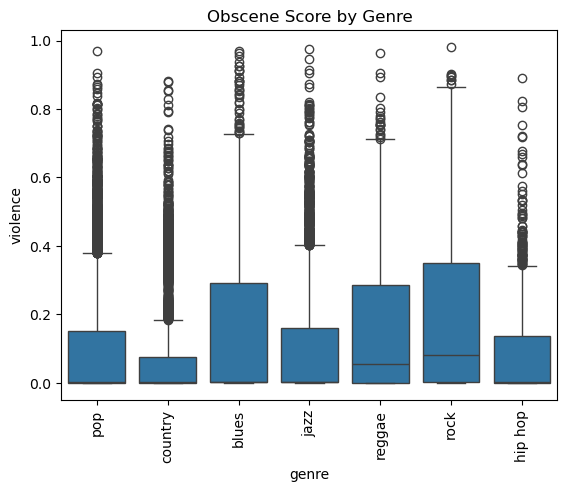

In [71]:
sns.boxplot(data=df, x='genre', y='violence')
plt.xticks(rotation=90)
plt.title('Obscene Score by Genre')
plt.show()

# Multivariate 

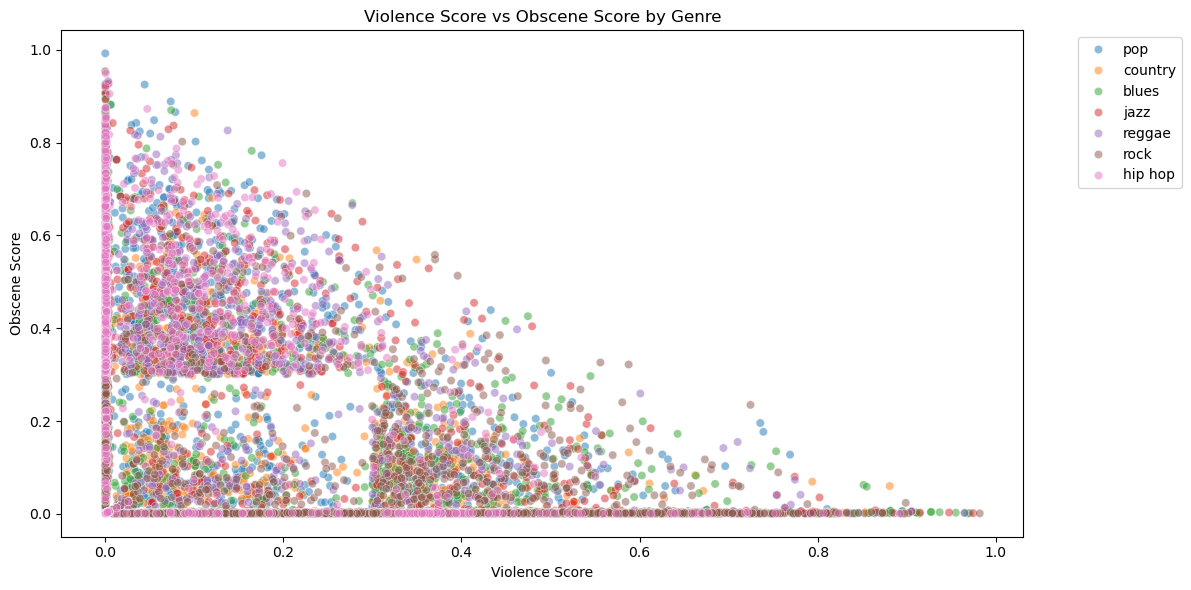

In [76]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='violence', y='obscene', hue='genre', alpha=0.5)
plt.title("Violence Score vs Obscene Score by Genre")
plt.xlabel('Violence Score')
plt.ylabel('Obscene Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

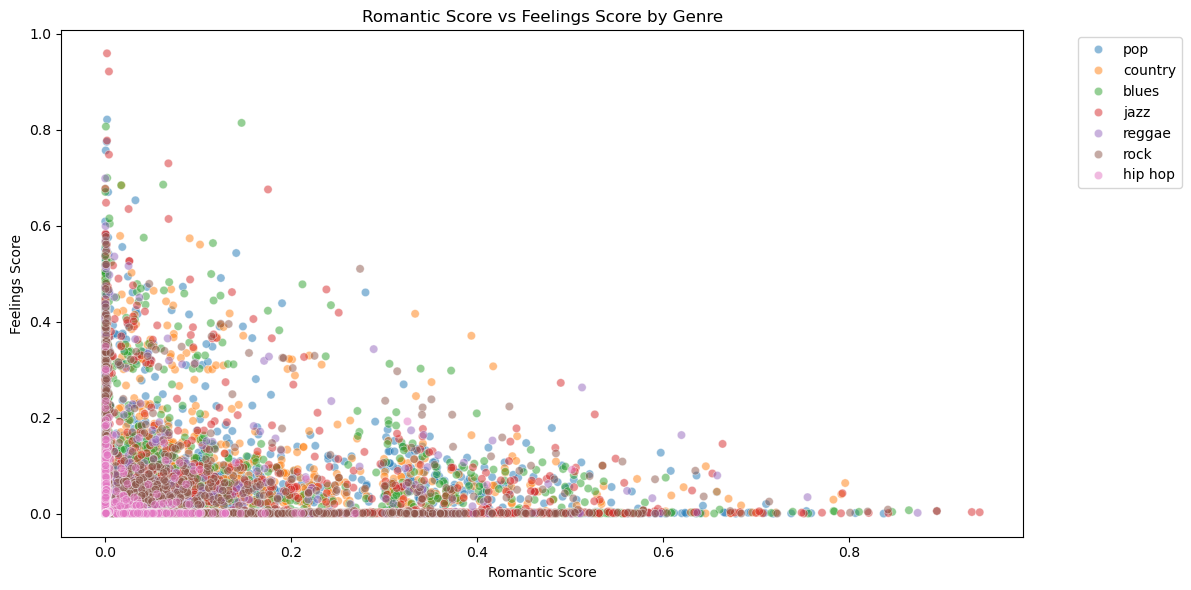

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='romantic', y='feelings', hue='genre', alpha=0.5)
plt.title("Romantic Score vs Feelings Score by Genre")
plt.xlabel('Romantic Score')
plt.ylabel('Feelings Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


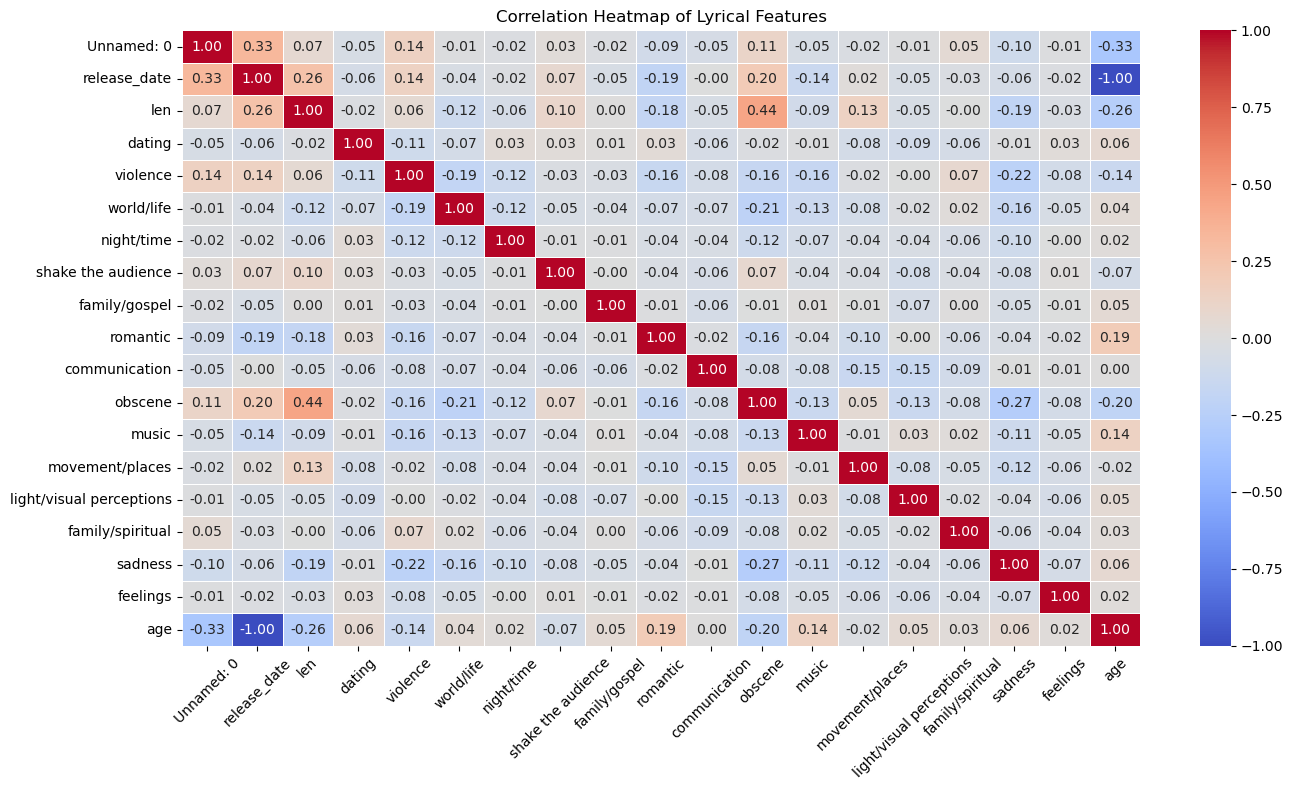

In [80]:
plt.figure(figsize=(14, 8))

# Only use numeric columns
numeric_df = df.select_dtypes(include='number')

# Create correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Lyrical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

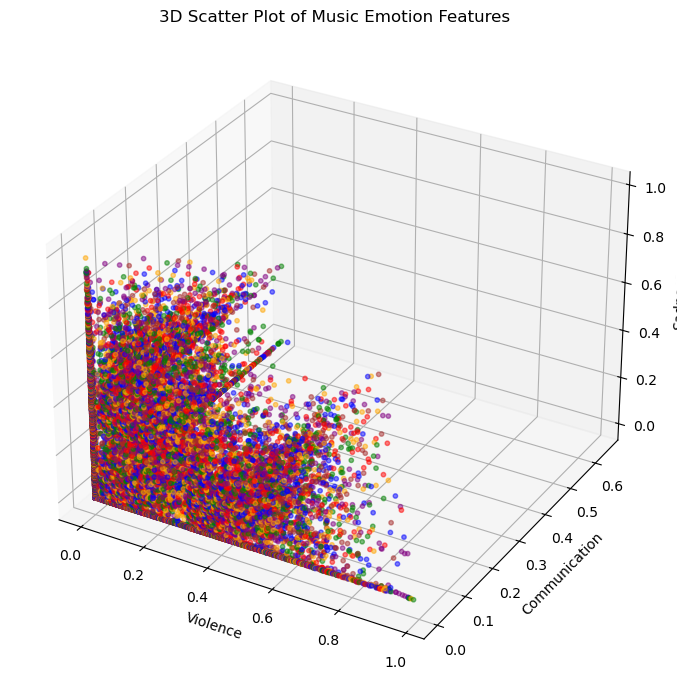

In [ ]:
# Select features
x = df['violence']
y = df['communication']
z = df['sadness']

# Create color cycle
colors = ['r', 'g', 'b', 'orange', 'purple', 'brown']
num_colors = len(colors)

# Generate an array of color indices and map them
color_indices = np.arange(len(df)) % num_colors
point_colors = [colors[i] for i in color_indices]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot with color variety
ax.scatter(x, y, z, alpha=0.5, s=10, c=point_colors)

# Axis labels and title
ax.set_xlabel('Violence')
ax.set_ylabel('Communication')
ax.set_zlabel('Sadness')
ax.set_title('3D Scatter Plot of Music Emotion Features')

plt.tight_layout()
plt.show()

